# Data Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import os

# Initialize NLTK stopwords
stop_words = set(stopwords.words('english'))

from tabulate import tabulate
import numpy as np
import pandas as pd
from scipy.spatial import distance
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from scipy import spatial
import string
import gensim.downloader as api
import string
import string
import seaborn as sns
sns.set_theme()

# importing packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function to preprocess text
def preprocess(s):
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    s = s.translate(translator)
    # Remove numbers
    translator = str.maketrans('', '', '0123456789')
    s = s.translate(translator)
    # Tokenize text
    tokens = word_tokenize(s)
    # Remove stop words and convert tokens to lowercase
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    filtered_tokens = [stem for stem, token in zip(stemmed_tokens, tokens) if stem != token]
    return ' '.join(filtered_tokens)

# Function to read and preprocess a file
def read_and_preprocess(file_path):
    # Read the file
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text = file.read().replace('\n', ' ')
    # Preprocess the text
    preprocessed_text = preprocess(text)
    # Get the filename and construct the new filename for the preprocessed text
    filename = os.path.basename(file_path)
    new_filename = "data_PreP/PreP_" + filename
    # Write the preprocessed text to a new file
    with open(new_filename, 'w', encoding='utf-8') as new_file:
        new_file.write(preprocessed_text)
    return preprocessed_text

# List of file paths to process
file_paths = ["A_Carlyle_ADAC.txt", "A_Carlyle_AMER.txt", "A_Furguson_EHCS.txt",
              "A_Geddes_TSPW.txt", "A_Grant_FNYG.txt","A_Grant_TPFP.txt",
              "A_Smith_MORA.txt", "A_Smith_WEAL.txt", "D_Hume_ECHU.txt",
              "D_Hume_ECPM.txt", "D_Hume_RELI.txt", "D_Hume_TRHN.txt",
              "G_Drummond_PWCE.txt", "H_Blair_CDPO.txt", "H_Mackenzie_MANO.txt",
              "J_Adams_POEL.txt", "J_Beattie_MINS.txt",
              "J_Beattie_TEOT.txt", "J_Burnet_OOPL.txt", "J_Craig_PICE.txt",
              "J_Home_DOUG.txt", "J_Macpherson_FAPH.txt", "J_Macpherson_FING.txt",
              "J_Macpherson_TEMO.txt", "J_Sinclair_OOSD.txt", "J_Sinclair_HOPS.txt",
              "J_Thomson_ALFR.txt", "J_Thomson_SEAS.txt", "M_Laing_HOSU.txt",
              "R_Fergusson_POEM.txt", "S_Johnson_JOUR.txt", "T_Sheridan_BEDU.txt",
              "T_Sheridan_ACOL.txt", "W_Shaw_EAPO.txt"]

# Dictionary to store preprocessed texts
preprocessed_texts = {}

# Process each file and save preprocessed text
for file_path in file_paths:
    file_path = "data/" + file_path
    preprocessed_texts[file_path] = read_and_preprocess(file_path)

# Modeling

In [ ]:
model = api.load("glove-wiki-gigaword-50") #choose from multiple models https://github.com/RaRe-Technologies/gensim-data

In [ ]:
# List of file paths to process
preprocessed_texts = ["PreP_A_Carlyle_ADAC.txt", "PreP_A_Carlyle_AMER.txt", "PreP_A_Furguson_EHCS.txt",
                      "PreP_A_Geddes_TSPW.txt", "PreP_A_Grant_FNYG.txt", "PreP_A_Grant_TPFP.txt",
                      "PreP_A_Smith_MORA.txt", "PreP_A_Smith_WEAL.txt", "PreP_D_Hume_ECHU.txt",
                      "PreP_D_Hume_ECPM.txt", "PreP_D_Hume_RELI.txt", "PreP_D_Hume_TRHN.txt",
                      "PreP_G_Drummond_PWCE.txt", "PreP_H_Blair_CDPO.txt", "PreP_H_Mackenzie_MANO.txt",
                      "PreP_J_Adams_POEL.txt", "PreP_J_Beattie_MINS.txt",
                      "PreP_J_Beattie_TEOT.txt", "PreP_J_Burnet_OOPL.txt", "PreP_J_Craig_PICE.txt",
                      "PreP_J_Home_DOUG.txt", "PreP_J_Macpherson_FAPH.txt", "PreP_J_Macpherson_FING.txt",
                      "PreP_J_Macpherson_TEMO.txt", "PreP_J_Sinclair_OOSD.txt", "PreP_J_Sinclair_HOPS.txt",
                      "PreP_J_Thomson_ALFR.txt", "PreP_J_Thomson_SEAS.txt", "PreP_M_Laing_HOSU.txt",
                      "PreP_R_Fergusson_POEM.txt", "PreP_S_Johnson_JOUR.txt", "PreP_T_Sheridan_BEDU.txt",
                      "PreP_T_Sheridan_ACOL.txt", "PreP_W_Shaw_EAPO.txt"]

#print(len(preprocessed_texts))


# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
corpus = []

# Append preprocessed texts to the corpus
for preprocessed_text in preprocessed_texts:
    # Read the file
    with open("data_PreP/" + preprocessed_text, 'r', encoding='utf-8', errors='ignore') as file:
      text = file.read().replace('\n', ' ')
    corpus.append(text)

# Compute TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
# Get vectors using the pre-trained GloVe model
def get_vector(s):
    tokens = word_tokenize(s)
    vectors = []
    for token in tokens:
        if token in model.key_to_index:
            vectors.append(model[token])
    if vectors:
        return np.sum(np.array(vectors), axis=0)
    else:
        return np.zeros_like(model["hello"])  # Return a zero vector if no valid word vectors are found

# Cosine similarity with normalized vectors
def cosine_similarity(vec1, vec2):
    vec1_normalized = vec1 / np.linalg.norm(vec1)
    vec2_normalized = vec2 / np.linalg.norm(vec2)
    return np.dot(vec1_normalized, vec2_normalized)

# Calculate similarities
results = []
for i in range(len(corpus)):
  for j in range(i, len(corpus)) :
    sim = cosine_similarity(get_vector(corpus[i]), get_vector(corpus[j]))
    results.append([preprocessed_texts[i], preprocessed_texts[j], sim])

# Sort results based on similarity coefficients in descending order
results.sort(key=lambda x: x[2], reverse=True)

# Print table
print(tabulate(results, headers=["Text File 1", "Text File 2", "Cosine Similarity"]))

Text File 1                 Text File 2                   Cosine Similarity
--------------------------  --------------------------  -------------------
PreP_J_Burnet_OOPL.txt      PreP_J_Burnet_OOPL.txt                 1
PreP_A_Carlyle_ADAC.txt     PreP_A_Carlyle_ADAC.txt                1
PreP_J_Beattie_MINS.txt     PreP_J_Beattie_MINS.txt                1
PreP_J_Home_DOUG.txt        PreP_J_Home_DOUG.txt                   1
PreP_A_Furguson_EHCS.txt    PreP_A_Furguson_EHCS.txt               1
PreP_A_Grant_TPFP.txt       PreP_A_Grant_TPFP.txt                  1
PreP_D_Hume_RELI.txt        PreP_D_Hume_RELI.txt                   1
PreP_D_Hume_TRHN.txt        PreP_D_Hume_TRHN.txt                   1
PreP_G_Drummond_PWCE.txt    PreP_G_Drummond_PWCE.txt               1
PreP_H_Blair_CDPO.txt       PreP_H_Blair_CDPO.txt                  1
PreP_H_Mackenzie_MANO.txt   PreP_H_Mackenzie_MANO.txt              1
PreP_J_Adams_POEL.txt       PreP_J_Adams_POEL.txt                  1
PreP_J_Macpherson_FA

(array([ 1.,  0.,  1.,  1.,  3.,  3.,  6.,  8.,  8.,  9., 12.,  6.,  9.,
        13., 12., 20., 18., 20., 19., 24., 20., 20., 23., 23., 16., 18.,
        26., 19., 17., 27., 34., 32., 29., 22., 25., 20., 11., 11.,  7.,
        37.]),
 array([0.68539876, 0.69326377, 0.70112884, 0.70899385, 0.7168589 ,
        0.72472394, 0.732589  , 0.740454  , 0.74831903, 0.7561841 ,
        0.7640491 , 0.7719142 , 0.7797792 , 0.78764427, 0.7955093 ,
        0.8033743 , 0.81123936, 0.8191044 , 0.82696944, 0.83483446,
        0.8426995 , 0.85056454, 0.85842955, 0.8662946 , 0.87415963,
        0.8820247 , 0.8898897 , 0.8977547 , 0.9056198 , 0.9134848 ,
        0.9213499 , 0.9292149 , 0.93707997, 0.944945  , 0.95281   ,
        0.96067506, 0.9685401 , 0.97640514, 0.98427016, 0.9921352 ,
        1.0000002 ], dtype=float32),
 <BarContainer object of 40 artists>)

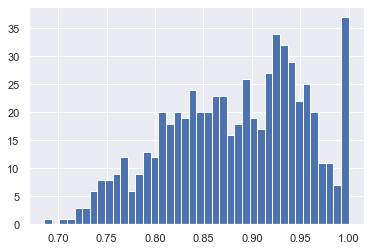

In [ ]:
import matplotlib.pyplot as plt
plt.hist([sublist[2] for sublist in results], bins = 40)

In [ ]:
print(type(results))
print(type(results[0]))

In [ ]:
# Extract unique labels
x_labels = sorted(set(item[0] for item in results))
y_labels = sorted(set(item[1] for item in results))

# Create a dictionary to map labels to indices
label_to_index = {label: idx for idx, label in enumerate(x_labels)}

# Initialize the matrix with NaNs (or zeros)
size = len(x_labels)
A = np.full((size, size), np.nan)

# Fill the matrix with the provided values
for x_label, y_label, value in results:
    x_idx = label_to_index[x_label]
    y_idx = label_to_index[y_label]
    A[x_idx, y_idx] = value
    A[y_idx, x_idx] = value  # Ensure symmetry

np.fill_diagonal(A, 0)
np.save('A.npy', A)

# Networks

The A.npy contains the adjacency matrix of the similarities between the texts we are analyzing. It must be uploaded to the files section of this colab document in order for it to run. Each entry corresponds with the similarity score between the ith column and jth row.

labels.csv contains a list of what work corresponds with each index.

In [ ]:
A = np.load('A.npy')
print(A)

[[0.         0.92165363 0.91834694 ... 0.94932353 0.93342829 0.93672282]
 [0.92165363 0.         0.96276754 ... 0.91959983 0.94177866 0.89413792]
 [0.91834694 0.96276754 0.         ... 0.9338823  0.95465106 0.90597367]
 ...
 [0.94932353 0.91959983 0.9338823  ... 0.         0.97513342 0.95848328]
 [0.93342829 0.94177866 0.95465106 ... 0.97513342 0.         0.95316815]
 [0.93672282 0.89413792 0.90597367 ... 0.95848328 0.95316815 0.        ]]


# Complete Weighted Network

Let us first consider perhaps the simplest case. We will create a complete network, with all pairs of nodes having a connection between them. These connections will be undirected. They will be weighted with the similarity value between the nodes. Essentially, we are just treating A as our final adjacency matrix.

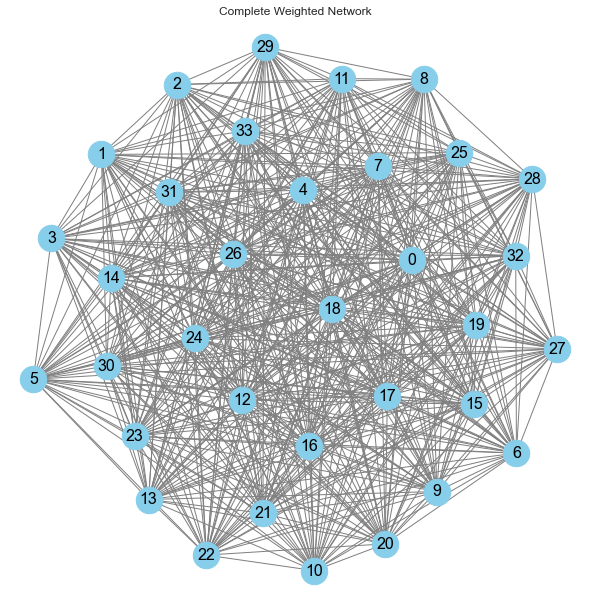

In [ ]:
G = nx.from_numpy_array(A)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels = True,
        node_size = 700,
        node_color = "skyblue",
        font_size = 16,
        font_color = "black",
        edge_color = "gray")
plt.title("Complete Weighted Network")
plt.show()

In [ ]:
degree = {v: sum(d['weight'] for u, v, d in G.edges(v, data=True)) for v in G.nodes()}

# Print the top 5 nodes with highest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = True)
print("Top 5 nodes with degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = False)
print("Top 5 nodes with lowest degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

Top 5 nodes with degree:
Node 13: Degree = 30.197323441505432
Node 14: Degree = 30.189363062381744
Node 31: Degree = 30.183644771575928
Node 30: Degree = 30.16730934381485
Node 25: Degree = 30.152326941490173


Top 5 nodes with lowest degree:
Node 5: Degree = 26.17112100124359
Node 19: Degree = 26.269299745559692
Node 29: Degree = 27.311261296272278
Node 12: Degree = 27.852708399295807
Node 20: Degree = 27.881082355976105


In [ ]:
pagerank = nx.pagerank(G)

# Print the top 5 nodes with highest pagerank
sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = True)
print("Top 5 nodes with highest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

print("\n")

sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = False)
# Print the top 5 nodes with lowest pagerank
print("Top 5 nodes with lowest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

Top 5 nodes with highest pagerank:
Node 13: Pagerank = 0.030526735622380834
Node 14: Pagerank = 0.03051990225913493
Node 31: Pagerank = 0.030512978427315936
Node 30: Pagerank = 0.030502615421464138
Node 25: Pagerank = 0.030487154280197572


Top 5 nodes with lowest pagerank:
Node 5: Pagerank = 0.02703555461848415
Node 19: Pagerank = 0.027118848692046574
Node 29: Pagerank = 0.02802597499141895
Node 12: Pagerank = 0.028490983923791673
Node 20: Pagerank = 0.028516254074914402


## Minimally Connected Network

The term "minimally connected network" is my own invention. Essentially, for this version, we use our knowledge that all of these works are clearly from the Scottish Enlightenment. Thus, we operate under the assumption that, at minimum, each work should be connected to at least one other work.

Thus, we minmax a similarity threshold to build our network. For each work, we find the maximum value of similarity to another work. Then, we find the minimum value of this across all works. Then we build an undirected, simple network of 0s and 1s such that we only connect networks if their similarity is at or above that threshold. This will be the network with the least amoutn of connections that will still ensure that all works are included in the network.

We see that, additionally, this also results in the additional fact that the graph is not bipartite.

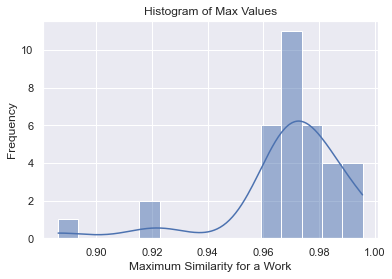

In [ ]:
max_values = np.max(A, axis=0).tolist()
sns.histplot(max_values, kde = True)

plt.title('Histogram of Max Values')
plt.xlabel('Maximum Similarity for a Work')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
print("Minmax threshold")
print(min(max_values))

A_2 = (A >= min(max_values)).astype(int)
print(A_2)

Minmax threshold
0.8863521814346313
[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


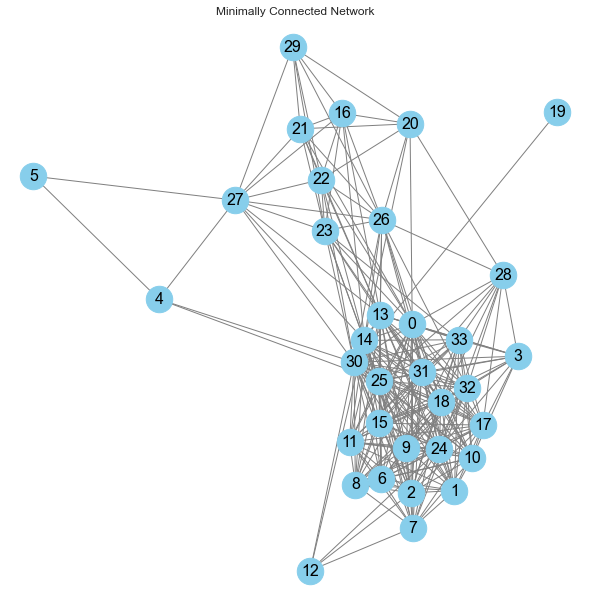

In [ ]:
G = nx.from_numpy_array(A_2)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels = True,
        node_size = 700,
        node_color = "skyblue",
        font_size = 16,
        font_color = "black",
        edge_color = "gray")
plt.title("Minimally Connected Network")
plt.show()

Our centrality measures for unweighted, undirected graphs will be degree, betweeness, and pagerank.
Node with the highest degree

In [ ]:
degree = nx.degree_centrality(G)

# Print the top 5 nodes with highest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = True)
print("Top 5 nodes with degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = False)
print("Top 5 nodes with lowest degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

Top 5 nodes with degree:
Node 30: Degree = 0.8181818181818182
Node 0: Degree = 0.7878787878787878
Node 14: Degree = 0.7878787878787878
Node 13: Degree = 0.7575757575757576
Node 25: Degree = 0.7272727272727273


Top 5 nodes with lowest degree:
Node 19: Degree = 0.030303030303030304
Node 5: Degree = 0.06060606060606061
Node 4: Degree = 0.12121212121212122
Node 12: Degree = 0.15151515151515152
Node 29: Degree = 0.21212121212121213


In [ ]:
betweenness = nx.betweenness_centrality(G)

# Print the top 5 nodes with highest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = True)
print("Top 5 nodes with highest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = False)
print("Top 5 nodes with lowest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

Top 5 nodes with highest betweenness:
Node 30: Betweenness = 0.13904180507586372
Node 14: Betweenness = 0.08028934277724914
Node 13: Betweenness = 0.06442928867332542
Node 0: Betweenness = 0.05719208397175665
Node 27: Betweenness = 0.05699725165185693


Top 5 nodes with lowest betweenness:
Node 5: Betweenness = 0.0
Node 12: Betweenness = 0.0
Node 19: Betweenness = 0.0
Node 6: Betweenness = 0.00035604203802733214
Node 8: Betweenness = 0.00035604203802733214


In [ ]:
pagerank = nx.pagerank(G)

# Print the top 5 nodes with highest pagerank
sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = True)
print("Top 5 nodes with highest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

print("\n")

sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = False)
# Print the top 5 nodes with lowest pagerank
print("Top 5 nodes with lowest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

Top 5 nodes with highest pagerank:
Node 30: Pagerank = 0.05083816006126034
Node 14: Pagerank = 0.045362463882012934
Node 0: Pagerank = 0.0444430685625692
Node 13: Pagerank = 0.04339608169389229
Node 25: Pagerank = 0.04151883165677703


Top 5 nodes with lowest pagerank:
Node 19: Pagerank = 0.006012223514318968
Node 5: Pagerank = 0.009398302944832524
Node 12: Pagerank = 0.011867933968864985
Node 4: Pagerank = 0.013578179607804025
Node 29: Pagerank = 0.01767953644481055


# Empirical Threshold.

It looks like there is a big jump in number of connections starting right after .91 according to various histograms. So let's set .91 as our threshold

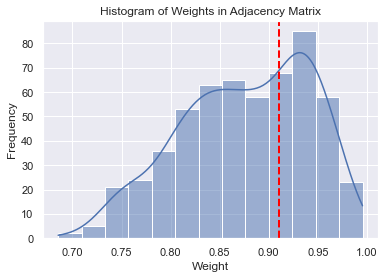

In [ ]:
weights = A[np.triu_indices(A.shape[0], k=1)]

# Plotting histogram of weights
sns.histplot(weights, kde = True)
plt.axvline(x = .91,
            color = 'red',
            linestyle = '--',
            linewidth = 2)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weights in Adjacency Matrix')
plt.show()

[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 0]
 [1 1 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 0 0 ... 1 1 0]]


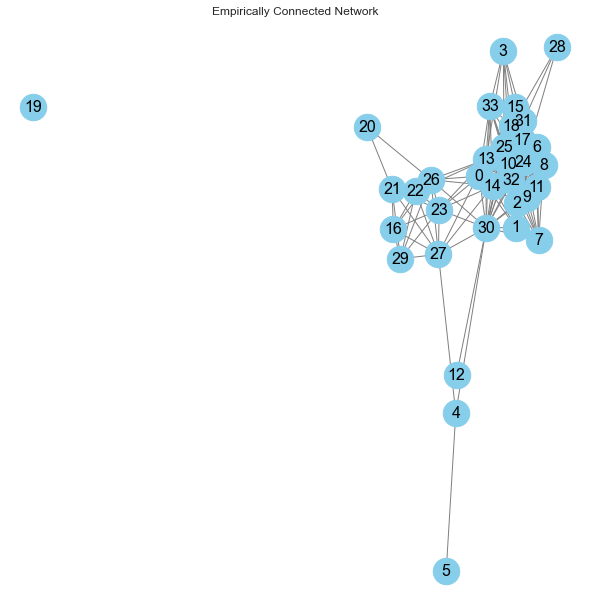

In [ ]:
A_3 = (A >= .91).astype(int)
print(A_3)

G = nx.from_numpy_array(A_3)

# Draw the graph
plt.figure(figsize = (8, 8))
nx.draw(G, with_labels = True,
        node_size = 700,
        node_color = "skyblue",
        font_size = 16,
        font_color = "black",
        edge_color = "gray")
plt.title("Empirically Connected Network")
plt.show()

In [ ]:
degree = nx.degree_centrality(G)

# Print the top 5 nodes with highest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = True)
print("Top 5 nodes with degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest degree
sorted_nodes = sorted(degree, key = degree.get, reverse = False)
print("Top 5 nodes with lowest degree:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Degree = {degree[sorted_nodes[i]]}")

Top 5 nodes with degree:
Node 13: Degree = 0.6666666666666667
Node 14: Degree = 0.6363636363636364
Node 18: Degree = 0.6060606060606061
Node 24: Degree = 0.6060606060606061
Node 30: Degree = 0.6060606060606061


Top 5 nodes with lowest degree:
Node 19: Degree = 0.0
Node 5: Degree = 0.030303030303030304
Node 12: Degree = 0.030303030303030304
Node 20: Degree = 0.06060606060606061
Node 4: Degree = 0.09090909090909091


In [ ]:
betweenness = nx.betweenness_centrality(G)

# Print the top 5 nodes with highest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = True)
print("Top 5 nodes with highest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

print("\n")

# Print the top 5 nodes with lowest betweenness
sorted_nodes = sorted(betweenness, key = betweenness.get, reverse = False)
print("Top 5 nodes with lowest betweenness:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Betweenness = {betweenness[sorted_nodes[i]]}")

Top 5 nodes with highest betweenness:
Node 30: Betweenness = 0.19937087849019672
Node 13: Betweenness = 0.13232613346249708
Node 26: Betweenness = 0.09600366489571034
Node 14: Betweenness = 0.07683625822830369
Node 27: Betweenness = 0.06413425589561952


Top 5 nodes with lowest betweenness:
Node 3: Betweenness = 0.0
Node 5: Betweenness = 0.0
Node 12: Betweenness = 0.0
Node 16: Betweenness = 0.0
Node 19: Betweenness = 0.0


In [ ]:
pagerank = nx.pagerank(G)

# Print the top 5 nodes with highest pagerank
sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = True)
print("Top 5 nodes with highest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

print("\n")

sorted_nodes = sorted(pagerank, key = pagerank.get, reverse = False)
# Print the top 5 nodes with lowest pagerank
print("Top 5 nodes with lowest pagerank:")
for i in range(5):
    print(f"Node {sorted_nodes[i]}: Pagerank = {pagerank[sorted_nodes[i]]}")

Top 5 nodes with highest pagerank:
Node 30: Pagerank = 0.05023303144524218
Node 13: Pagerank = 0.04820805611006364
Node 14: Pagerank = 0.04510734100541845
Node 18: Pagerank = 0.04211114742926441
Node 31: Pagerank = 0.04211114742926441


Top 5 nodes with lowest pagerank:
Node 19: Pagerank = 0.004524886877828056
Node 12: Pagerank = 0.006659796411388747
Node 5: Pagerank = 0.009477780971534525
Node 28: Pagerank = 0.009887370119261087
Node 20: Pagerank = 0.01027850992815744
